### Question 1
Import the station status data from station status link and the station information data
from station information link. These JSON files are part of the "General Bikeshare Feed
Specification" and provide real-time records of station status. Create dataframes to
store the current station status and station information.

In [29]:
import requests
import pandas as pd

# Replace these with the actual URLs of your JSON files
station_status_url = 'https://gbfs.lyft.com/gbfs/2.3/bkn/es/station_status.json'
station_info_url = 'https://gbfs.lyft.com/gbfs/2.3/bkn/es/station_information.json'

# Fetch and load station status data into a DataFrame
df_station_status = pd.DataFrame(requests.get(station_status_url).json()['data']['stations'])

# Fetch and load station information data into a DataFrame
df_station_info = pd.DataFrame(requests.get(station_info_url).json()['data']['stations'])

# Display the head of both DataFrames to verify
print("Station Status DataFrame:")
print(df_station_status.head())

print("\nStation Information DataFrame:")
print(df_station_info.head())

Station Status DataFrame:
   num_docks_available                            station_id  \
0                    0  0bd9bd58-42e6-4680-9d19-83943372221f   
1                    0  816e50eb-dc4b-47dc-b773-154e2020cb0d   
2                   47  09dfc0e3-a448-477c-bb3c-9467dc51ef8d   
3                    0  66dd4ccc-0aca-11e7-82f6-3863bb44ef7c   
4                    2  c4e9905f-457b-4be0-a878-2aa53fa0b09b   

   num_bikes_available  num_docks_disabled  is_installed  num_bikes_disabled  \
0                    0                   0             0                   0   
1                    0                   0             0                   0   
2                    0                   1             0                   0   
3                    0                   0             0                   0   
4                   20                   0             1                   1   

   is_returning  num_ebikes_available  is_renting  last_reported  \
0             0                     0   

In [32]:
df_station_status

num_docks_available                            station_id  \
0                       0  0bd9bd58-42e6-4680-9d19-83943372221f   
1                       0  816e50eb-dc4b-47dc-b773-154e2020cb0d   
2                      47  09dfc0e3-a448-477c-bb3c-9467dc51ef8d   
3                       0  66dd4ccc-0aca-11e7-82f6-3863bb44ef7c   
4                       2  c4e9905f-457b-4be0-a878-2aa53fa0b09b   
...                   ...                                   ...   
2223                   17  66dd5a42-0aca-11e7-82f6-3863bb44ef7c   
2224                    5  5faf99b8-9046-450f-9d2a-d13279b3d016   
2225                    8  519824e4-69ba-4270-a395-17c204f328f8   
2226                    0  cbc48689-7805-49dd-9669-5471f4b7b6fb   
2227                   11  5aa81a37-ea1d-4bf6-ab40-4751c6b4fb08   

      num_bikes_available  num_docks_disabled  is_installed  \
0                       0                   0             0   
1                       0                   0             0   
2                       0                   1             0   
3                       0                   0             0   
4                      20                   0             1   
...                   ...                 ...           ...   
2223                    5                   0             1   
2224                   26                   0             1   
2225                   13                   0             1   
2226                   22                   6             1   
2227                    7                   0             1   

      num_bikes_disabled  is_returning  num_ebikes_available  is_renting  \
0                      0             0                     0           0   
1                      0             0                     0           0   
2                      0             0                     0           0   
3                      0             0                     0           0   
4                      1             1                     8           1   
...                  ...           ...                   ...         ...   
2223                   0             1                     1           1   
2224                   1             1                    15           1   
2225                   0             1                     1           1   
2226                   1             1                    18           1   
2227                   0             1                     0           1   

      last_reported                            vehicle_types_available  \
0        1729514620  [{'count': 0, 'vehicle_type_id': '1'}, {'count...   
1        1730827344  [{'count': 0, 'vehicle_type_id': '1'}, {'count...   
2        1730902019  [{'count': 0, 'vehicle_type_id': '1'}, {'count...   
3        1730990213  [{'count': 0, 'vehicle_type_id': '1'}, {'count...   
4        1731211108  [{'count': 12, 'vehicle_type_id': '1'}, {'coun...   
...             ...                                                ...   
2223     1731211213  [{'count': 4, 'vehicle_type_id': '1'}, {'count...   
2224     1731211226  [{'count': 11, 'vehicle_type_id': '1'}, {'coun...   
2225     1731211227  [{'count': 12, 'vehicle_type_id': '1'}, {'coun...   
2226     1731211224  [{'count': 4, 'vehicle_type_id': '1'}, {'count...   
2227     1731211220  [{'count': 7, 'vehicle_type_id': '1'}, {'count...   

      num_scooters_unavailable  num_scooters_available  
0                          NaN                     NaN  
1                          NaN                     NaN  
2                          NaN                     NaN  
3                          NaN                     NaN  
4                          0.0                     0.0  
...                        ...                     ...  
2223                       0.0                     0.0  
2224                       0.0                     0.0  
2225                       0.0                     0.0  
2226                       0.0                     0.0  
2227           

### Question 2
Merge the two dataframes using a common identifier, and visualize the number of
available bikes based on the geographical areas provided in the station information
data.

In [14]:
df_combined = df_station_status.merge(df_station_info,how='inner',on='station_id')
df_combined

num_docks_available                            station_id  \
0                       0  0bd9bd58-42e6-4680-9d19-83943372221f   
1                       0  816e50eb-dc4b-47dc-b773-154e2020cb0d   
2                      47  09dfc0e3-a448-477c-bb3c-9467dc51ef8d   
3                       0  66dd4ccc-0aca-11e7-82f6-3863bb44ef7c   
4                       1  498d7e8e-5164-4f26-9ce6-399947d73b1a   
...                   ...                                   ...   
2223                   10  581211b2-4e42-48f2-8a8f-5f968cb1c5df   
2224                   19  66dd5a42-0aca-11e7-82f6-3863bb44ef7c   
2225                    9  519824e4-69ba-4270-a395-17c204f328f8   
2226                   10  66ddddb4-0aca-11e7-82f6-3863bb44ef7c   
2227                   11  46813ecf-8df4-4c8f-9579-0179e0b36ba6   

      num_bikes_available  num_docks_disabled  is_installed  \
0                       0                   0             0   
1                       0                   0             0   
2                       0                   1             0   
3                       0                   0             0   
4                      15                   0             1   
...                   ...                 ...           ...   
2223                   20                   0             1   
2224                    3                   0             1   
2225                   12                   0             1   
2226                    4                   0             1   
2227                    5                   0             1   

      num_bikes_disabled  is_returning  num_ebikes_available  is_renting  \
0                      0             0                     0           0   
1                      0             0                     0           0   
2                      0             0                     0           0   
3                      0             0                     0           0   
4                      1             1                     3           1   
...                  ...           ...                   ...         ...   
2223                   3             1                    16           1   
2224                   0             1                     1           1   
2225                   0             1                     0           1   
2226                   0             1                     1           1   
2227                   2             1                     3           1   

      last_reported                            vehicle_types_available  \
0        1729514620  [{'count': 0, 'vehicle_type_id': '1'}, {'count...   
1        1730827344  [{'count': 0, 'vehicle_type_id': '1'}, {'count...   
2        1730902019  [{'count': 0, 'vehicle_type_id': '1'}, {'count...   
3        1730990213  [{'count': 0, 'vehicle_type_id': '1'}, {'count...   
4        1731209149  [{'count': 12, 'vehicle_type_id': '1'}, {'coun...   
...             ...                                                ...   
2223     1731209148  [{'count': 4, 'vehicle_type_id': '1'}, {'count...   
2224     1731209150  [{'count': 2, 'vehicle_type_id': '1'}, {'count...   
2225     1731209217  [{'count': 12, 'vehicle_type_id': '1'}, {'coun...   
2226     1731209133  [{'count': 3, 'vehicle_type_id': '1'}, {'count...   
2227     1731209246  [{'count': 2, 'vehicle_type_id': '1'}, {'count...   

      num_scooters_unavailable  num_scooters_available region_id  \
0                          NaN                     NaN        71   
1                          NaN                     NaN        71   
2                          NaN                     NaN        71   
3                          NaN                     NaN        71   
4                          0.0                     0.0        71   
...                        ...                     ...       ...   
2223                       0.0                     0.0        70   
2224                       0.0                     0.0        70   
2225                       0.0

In [18]:
import folium

# Initialize a folium map centered around the average location
map_center = [df_combined['lat'].mean(), df_combined['lon'].mean()]
bike_map = folium.Map(location=map_center, zoom_start=12)

# Add stations to the map
for _, row in df_combined.iterrows():
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=f"Station: {row['name']}<br>Bikes Available: {row['num_bikes_available']}",
        tooltip=row['name']
    ).add_to(bike_map)

# Display map
bike_map.save("bike_availability_map.html")
bike_map

### Question 3
Determine the current utilization rate for each station by calculating the percentage of
bikes in use relative to the total capacity of each station. Display the utilization rate on a
map.

In [19]:
# Calculate the utilization rate
df_combined['utilization_rate'] = (df_combined['num_bikes_available'] / df_combined['capacity']) * 100

# Define a function to choose marker color based on utilization rate
def get_marker_color(utilization_rate):
    if utilization_rate > 80:
        return 'red'       # High utilization
    elif utilization_rate > 40:
        return 'orange'    # Medium utilization
    else:
        return 'green'     # Low utilization

# Initialize a folium map centered around the average location
map_center = [df_combined['lat'].mean(), df_combined['lon'].mean()]
utilization_map = folium.Map(location=map_center, zoom_start=12)

# Add stations to the map with color-coded markers
for _, row in df_combined.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=7,
        color=get_marker_color(row['utilization_rate']),
        fill=True,
        fill_color=get_marker_color(row['utilization_rate']),
        fill_opacity=0.6,
        popup=(
            f"Station: {row['name']}<br>"
            f"Bikes Available: {row['num_bikes_available']}<br>"
            f"Capacity: {row['capacity']}<br>"
            f"Utilization Rate: {row['utilization_rate']:.2f}%"
        )
    ).add_to(utilization_map)

# Save and display the map
utilization_map.save("bike_utilization_rate_map.html")
utilization_map

### Question 4
Using the station information data, group the stations by neighborhood or area
(region_id). Create a pivot table to show the total number of available bikes, available
docks, and overall capacity for each neighborhood. Identify which neighborhood has
the highest total bike availability and which has the highest total dock availability.

In [25]:
# Use pivot_table to group and aggregate by region_id
pivot_table = pd.pivot_table(
    df_station_info, 
    values='capacity',  # Summing the capacity
    index='region_id',  # Grouping by neighborhood
    aggfunc='sum'  # Summing the capacity for each region_id
)

# Display the pivot table
print(pivot_table)

# Identify the neighborhood with the highest total capacity
max_capacity_region = pivot_table['capacity'].idxmax()
max_capacity_value = pivot_table['capacity'].max()

print(f"Neighborhood with highest total capacity: Region {max_capacity_region} with {max_capacity_value} total capacity.")

           capacity
region_id          
311             580
70             1043
71            67686
Neighborhood with highest total capacity: Region 71 with 67686 total capacity.


### Question 5
Calculate the total number of disabled docks and bikes across all stations. Create a
summary table that includes the station information, total number of disabled docks,
total number of disabled bikes, and the percentage of disabled bikes relative to the total
bikes available at each station.

In [26]:
# Calculate the total number of disabled docks and bikes
df_combined['disabled_docks'] = df_combined['num_docks_disabled']
df_combined['disabled_bikes'] = df_combined['num_bikes_disabled']

# Calculate the percentage of disabled bikes relative to the total available bikes
df_combined['disabled_bike_percentage'] = (df_combined['disabled_bikes'] / df_combined['num_bikes_available']) * 100

# Create a summary table with station information and calculated values
summary_table = df_combined[['station_id', 'name', 'disabled_docks', 'disabled_bikes', 'disabled_bike_percentage']]

# Display the summary table
print(summary_table)

# Calculate the total number of disabled docks and bikes across all stations
total_disabled_docks = df_combined['disabled_docks'].sum()
total_disabled_bikes = df_combined['disabled_bikes'].sum()

print(f"Total number of disabled docks across all stations: {total_disabled_docks}")
print(f"Total number of disabled bikes across all stations: {total_disabled_bikes}")

                                station_id                         name  \
0     0bd9bd58-42e6-4680-9d19-83943372221f                6 Ave & 60 St   
1     816e50eb-dc4b-47dc-b773-154e2020cb0d                52 St & 6 Ave   
2     09dfc0e3-a448-477c-bb3c-9467dc51ef8d              W 15 St & 6 Ave   
3     66dd4ccc-0aca-11e7-82f6-3863bb44ef7c  Central Park West & W 72 St   
4     498d7e8e-5164-4f26-9ce6-399947d73b1a  Suydam St & St Nicholas Ave   
...                                    ...                          ...   
2223  581211b2-4e42-48f2-8a8f-5f968cb1c5df         Bergen Ave & Sip Ave   
2224  66dd5a42-0aca-11e7-82f6-3863bb44ef7c                    Warren St   
2225  519824e4-69ba-4270-a395-17c204f328f8         8 St & Washington St   
2226  66ddddb4-0aca-11e7-82f6-3863bb44ef7c             Monmouth and 6th   
2227  46813ecf-8df4-4c8f-9579-0179e0b36ba6           Marshall St & 2 St   

      disabled_docks  disabled_bikes  disabled_bike_percentage  
0                  0              

### Question 6
Is there correlation between the number of disabled docks and bikes?

Pearson correlation between disabled docks and disabled bikes: -0.004594748874125051


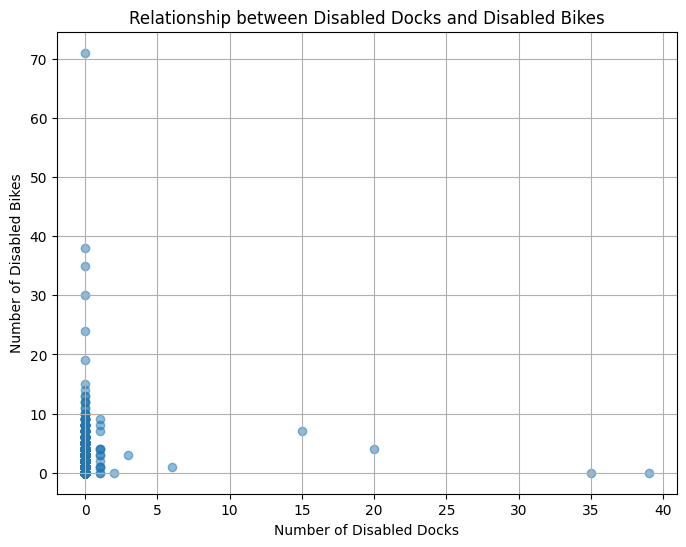

In [28]:
import matplotlib.pyplot as plt
# Calculate correlation between the number of disabled docks and bikes
correlation = df_combined['num_docks_disabled'].corr(df_combined['num_bikes_disabled'])

# Display the correlation value
print(f"Pearson correlation between disabled docks and disabled bikes: {correlation}")

# Optional: Visualize the relationship with a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_combined['num_docks_disabled'], df_combined['num_bikes_disabled'], alpha=0.5)
plt.title('Relationship between Disabled Docks and Disabled Bikes')
plt.xlabel('Number of Disabled Docks')
plt.ylabel('Number of Disabled Bikes')
plt.grid(True)
plt.show()